In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train
import utilities

In [4]:
import ast
import os

from collections import Counter, defaultdict

In [5]:
# data = utilities.read_all()

In [6]:
# data = utilities.filter_by_count(data, 25, 70)

In [7]:
# print(sorted(data.keys()))

In [8]:
batch_sampler = train.StratifiedBatcherPreprocessed({}, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [10]:
utilities.load_batcher(batch_sampler, "./experiments/Codeforces-32/not_regularized/new_debug-Codeforces-names-32_classes/")

In [11]:
batch_sampler.classes

['DASmirnov',
 'Dehaka',
 'Ferume',
 'Mad_Andrei',
 'Mad_screwdriver',
 'Marble1',
 'Orion',
 'Pastafarianist',
 'Pr0tick',
 'SashaPROS3',
 'Savit_Gupta',
 'agw02010',
 'airwalker',
 'alex99999',
 'asvasil22',
 'bharath',
 'blooo',
 'cgfs10000',
 'dvec',
 'empty_walls',
 'flygrounder',
 'hari22499',
 'kek',
 'knight-erraunt',
 'minatoNamikaze',
 'nitixkrai',
 'pylol',
 'rep777',
 'saku7',
 'swapnilsmn',
 'usachevd0',
 'vietanhs0817']

In [12]:
batch_sampler.get_n_classes()

32

In [13]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([26, 21, 25, 52, 42, 48, 55, 28, 26, 20, 48, 40, 41, 52, 22, 26, 24,
        27, 41, 20, 23, 20, 20, 24, 21, 28, 21, 20, 43, 40, 21, 20]))

In [14]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([ 7,  6,  7, 14, 11, 13, 14,  8,  7,  5, 12, 11, 11, 14,  6,  7,  6,
         7, 11,  6,  6,  6,  6,  7,  6,  7,  6,  6, 11, 11,  6,  6]))

In [15]:
model_params = {
    "n_classes":batch_sampler.get_n_classes(),
    "encoder_params": {
        "embedding_dims":100,
        "combiner_dims":100,
        "name_embedding_dims":100,
        "dropout":0.2,
        "num_layers":1, "rnn_dropout":0.0,
        "most_common_names_file":"most_common_names_all_datasets.pkl",
        "OOV_ID":0
        
    },
    'reqularizer_alpha':0.001
}

In [16]:
track_metric = {
    "metric_name":"accuracy",
    "function":train.validate_max
}

In [17]:
cls = model.NameModel(model_params)

In [18]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()), track_metric, "experiments/Codeforces-32/regularized/names/")

In [19]:
torch.set_num_threads(1)

In [22]:
# trainer.train_metrics['grads_embeddings']

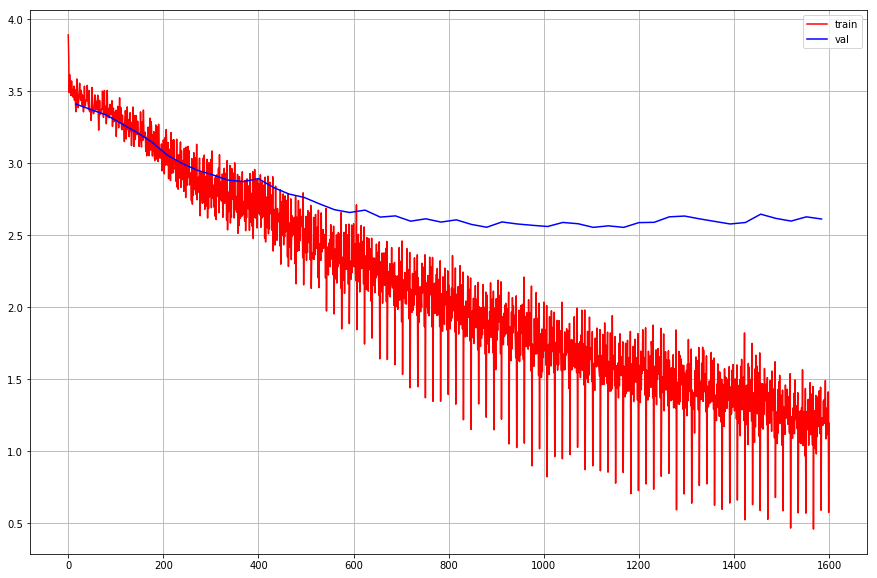

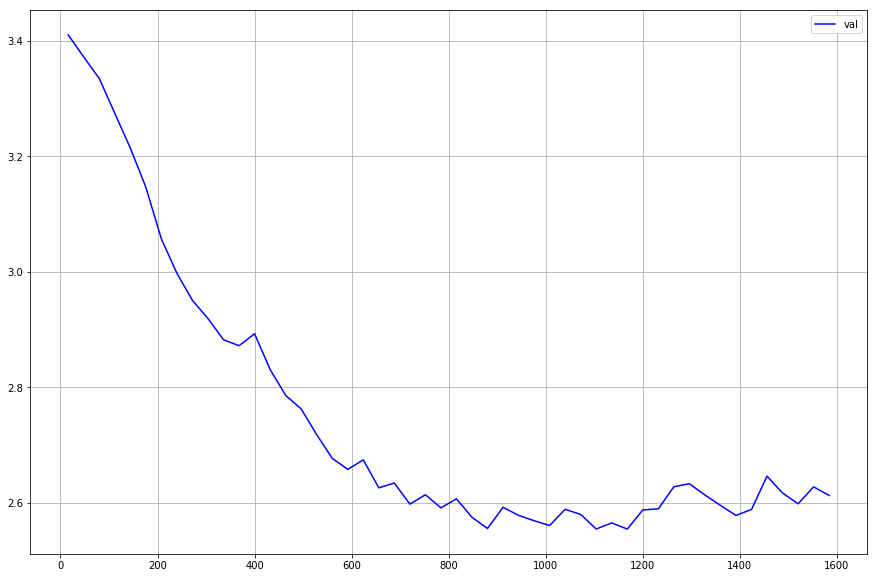

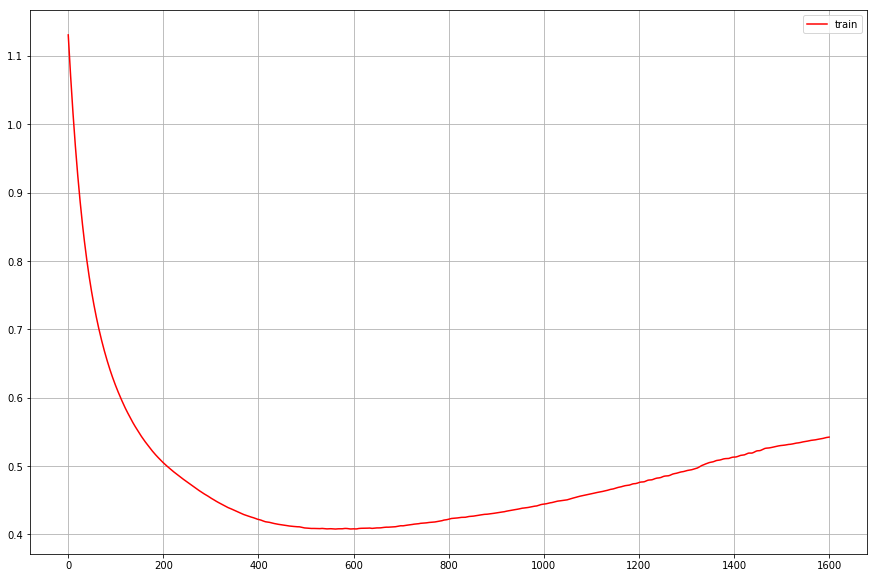

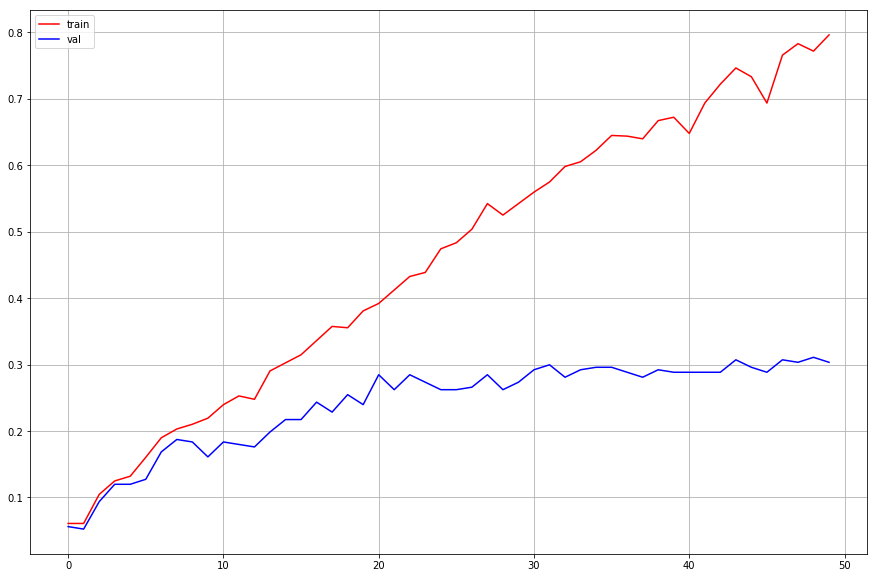

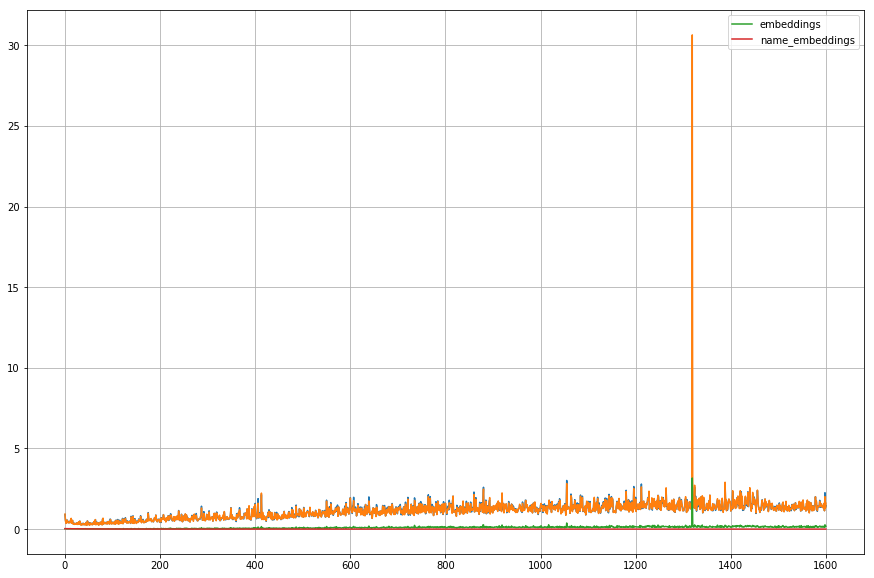

KeyboardInterrupt: 

In [23]:
trainer.train(batch_sampler, {"n_epochs":100, "validate_every":2})

In [35]:
import gc
gc.collect()

13567

Accuracy =  0.9299492385786802


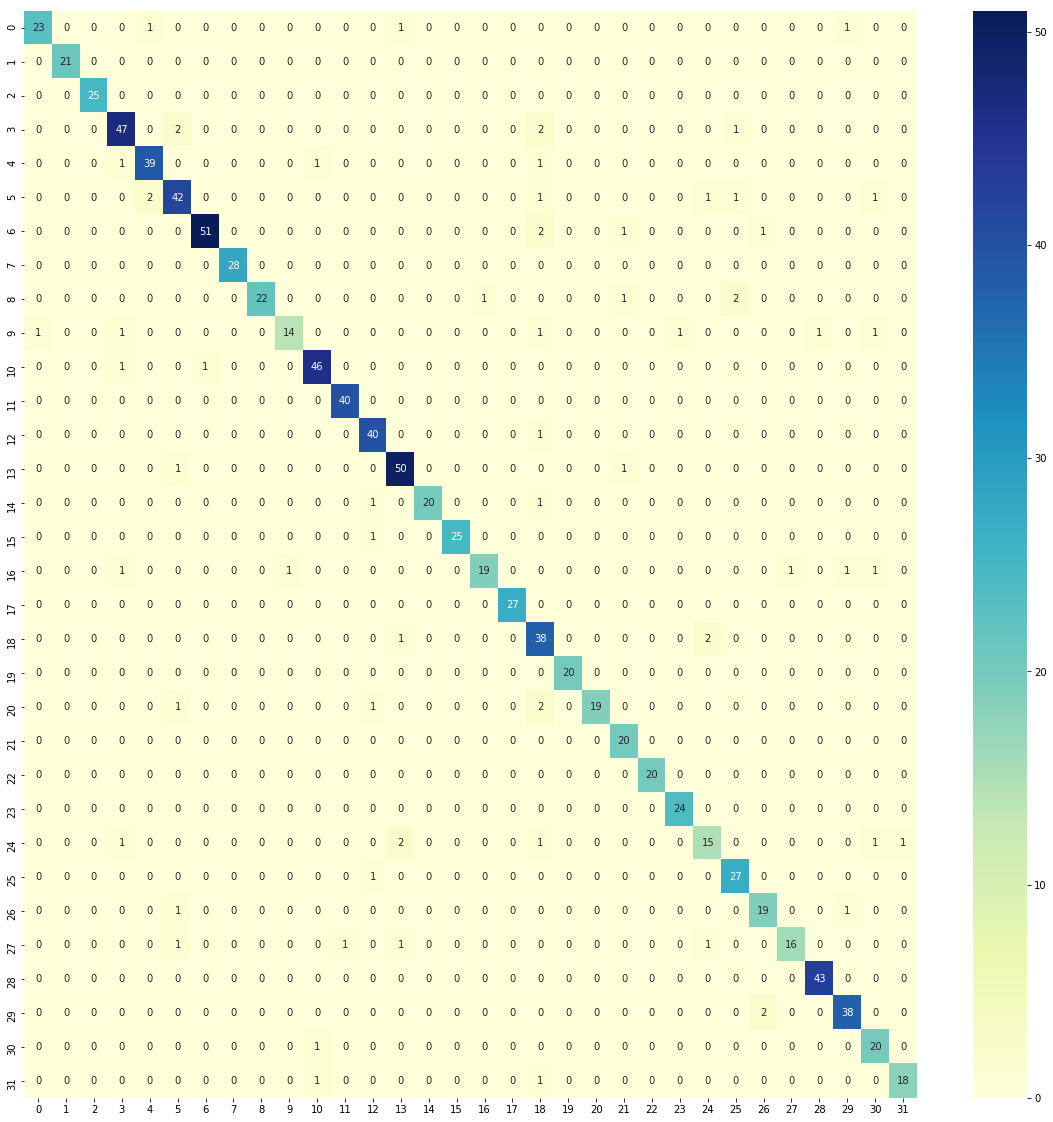

In [36]:
utilities.print_confusion_matrix(cls, batch_sampler.x_train, batch_sampler.y_train)

Accuracy =  0.3970037453183521


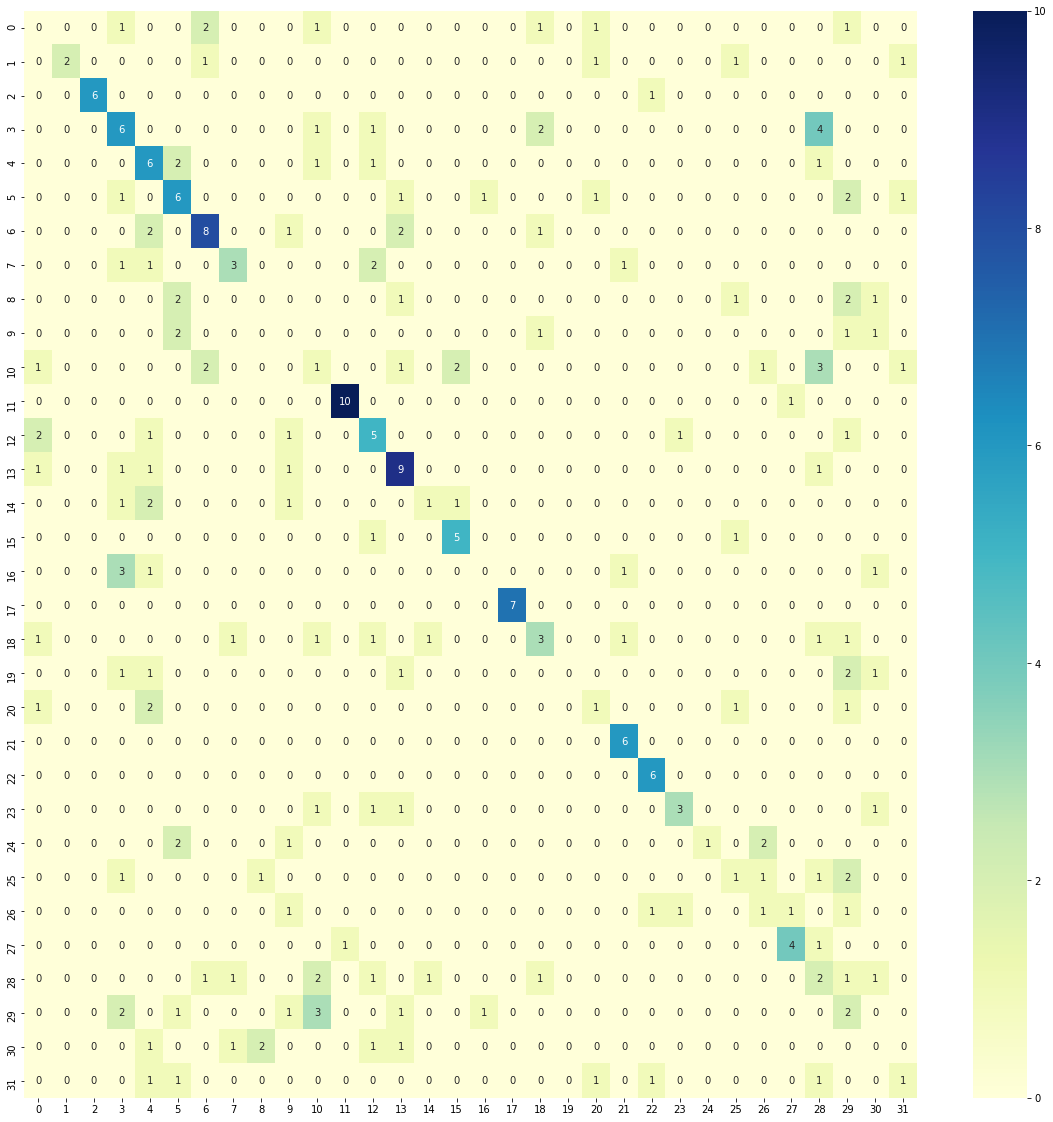

In [37]:
utilities.print_confusion_matrix(cls, batch_sampler.x_test, batch_sampler.y_test)

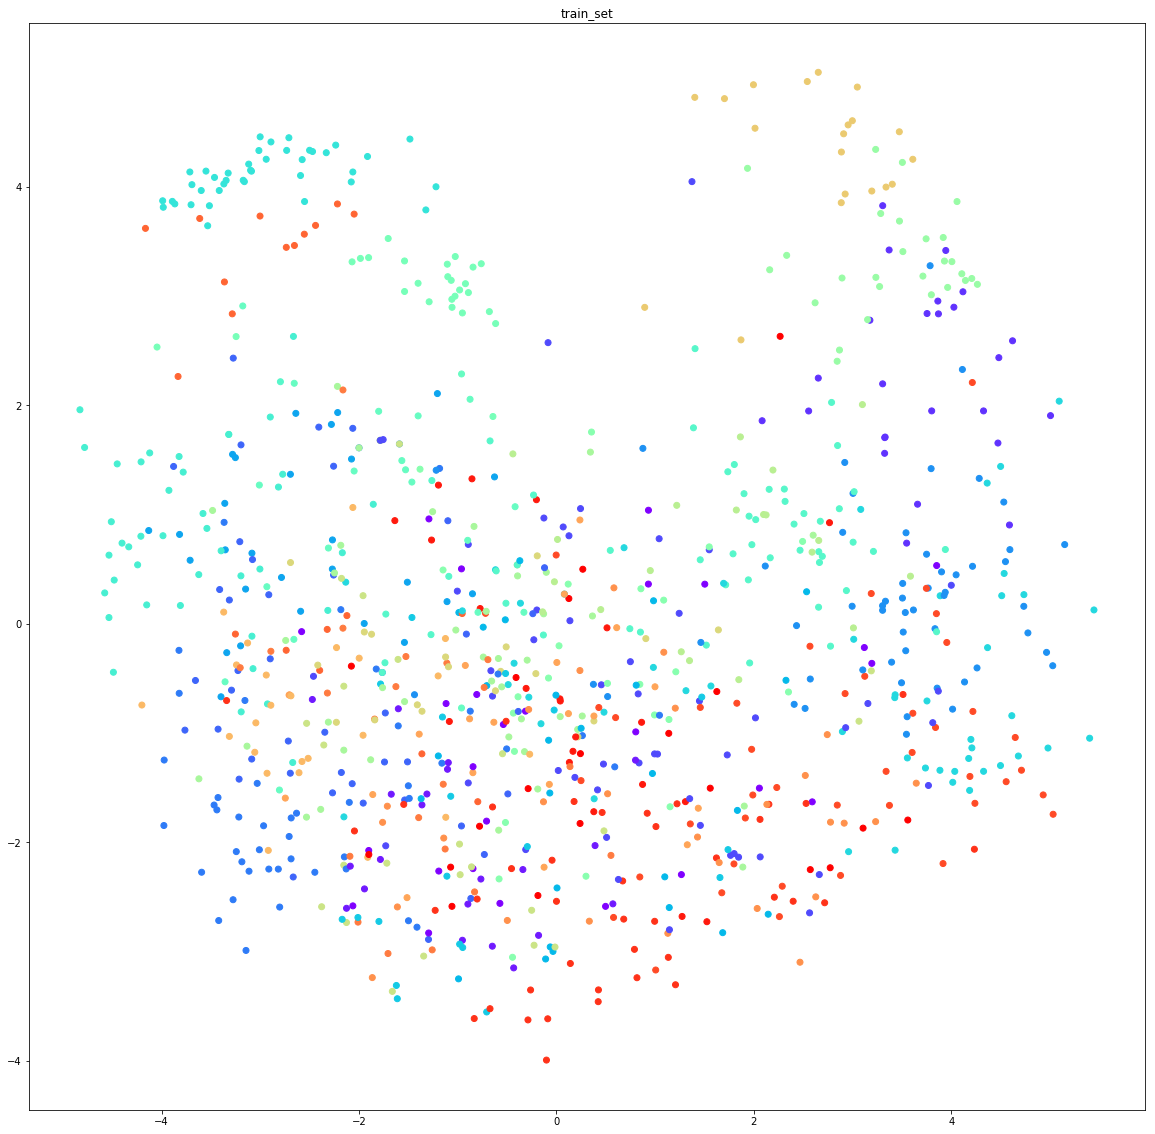

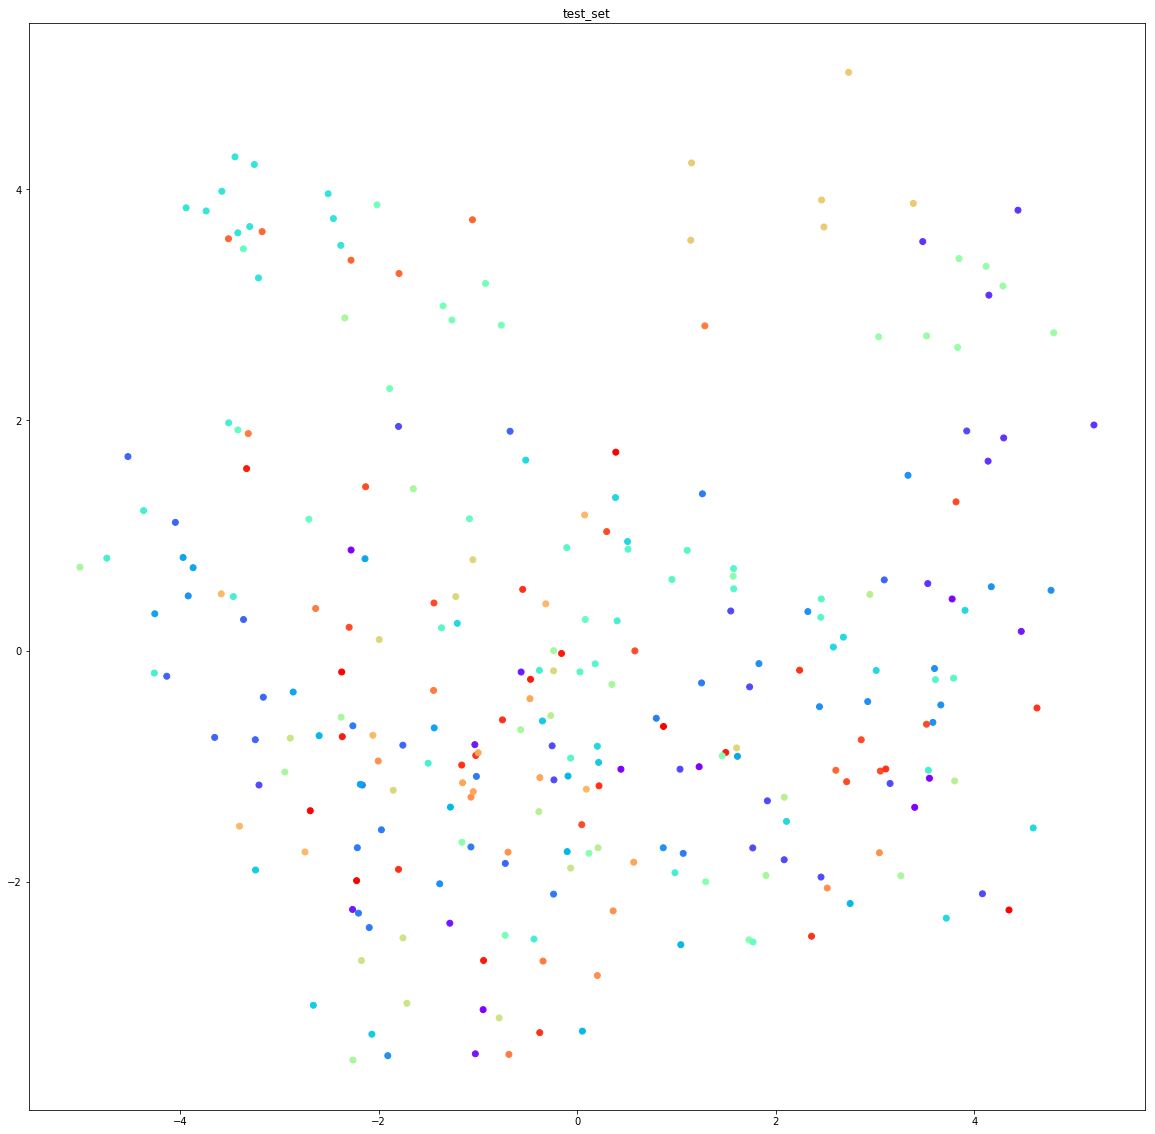

In [38]:
utilities.plot_pca(batch_sampler, cls)